In [1]:
%run /home/dbaciur/NTU/NTU/notes/Constants.ipynb

Constants loaded


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

## Import annotations

In [6]:
visual_df = pd.read_csv(C.VISUAL_EVENTS_PATH)
visual_state_df = visual_df[visual_df[C.A_BEH_ID].isin(C.STATE_BEHS)]
visual_point_df = visual_df[visual_df[C.A_BEH_ID].isin(C.POINT_BEHS)]
print(len(visual_df))
print(len(visual_state_df))
print(len(visual_point_df))

19764
14712
5052


## Analyze length

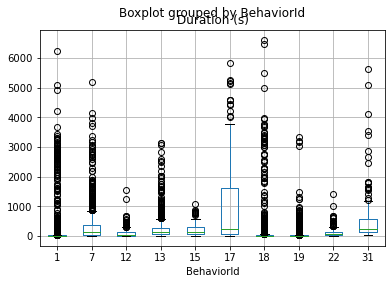

In [8]:
visual_state_df.boxplot(column=C.A_DURATION, by=C.A_BEH_ID)

# Analyze collisions - deprecated (will be in python repo)

In [6]:
videos_set = annotations_df[VIDEO].unique()
number_of_videos = len(videos_set)
number_of_videos

114

In [9]:
beh_pairs = []
for beh1 in REL_STATE_BEH:
    for beh2 in REL_STATE_BEH:
        if beh1 == beh2:
            continue
        beh_pairs.append((beh1, beh2))
beh_pairs

[(1, 7),
 (1, 13),
 (1, 15),
 (1, 22),
 (7, 1),
 (7, 13),
 (7, 15),
 (7, 22),
 (13, 1),
 (13, 7),
 (13, 15),
 (13, 22),
 (15, 1),
 (15, 7),
 (15, 13),
 (15, 22),
 (22, 1),
 (22, 7),
 (22, 13),
 (22, 15)]

In [10]:
class CollisionsData:
    
    def __init__(self, beh_pair, beh1_count, collisions_count, collisions_on_average):
        self.beh_pair = beh_pair
        self.beh1_count = beh1_count
        self.collisions_count = collisions_count
        self.collisions_on_average = collisions_on_average
    
    def __repr__(self):
        return f"{self.beh_pair}, {self.beh1_count}, {self.collisions_count}, {self.collisions_on_average}"

In [11]:
videos_collisions_data_by_pair = dict()
for pair in beh_pairs:
    videos_collisions_data_by_pair[pair] = []
    
for video in tqdm(videos_set):
    
    for pair in beh_pairs:
        
        beh_1 = pair[0]
        beh_2 = pair[1]
        
        beh_1_df = annotations_df[(annotations_df[VIDEO] == video) & (annotations_df[BEHAVIOR_ID] == beh_1)]
        beh_2_df = annotations_df[(annotations_df[VIDEO] == video) & (annotations_df[BEHAVIOR_ID] == beh_2)]
        
        beh_1_count = len(beh_1_df)
        beh_1_coll_count = 0
        for row_index1, row1 in beh_1_df.iterrows():
            
            start1 = row1[START]
            stop1 = row1[STOP]
            
            for row_index2, row2 in beh_2_df.iterrows():
                
                start2 = row2[START]
                stop2 = row2[STOP]
                
                no_collision = (stop1 < start2 or start1 > stop2)
                if not no_collision:
                    beh_1_coll_count += 1
                    break
        
        # ignore videos where particular behavior doesn't even exist
        if beh_1_count > 0:
            avg = beh_1_coll_count / beh_1_count
            coll_data = CollisionsData(pair, beh_1_count, beh_1_coll_count, avg)
            videos_collisions_data_by_pair[pair].append(coll_data)
        

100%|██████████| 114/114 [00:56<00:00,  2.02it/s]


In [12]:
colls_videos_data = videos_collisions_data_by_pair[(B_CHARTS_S, B_IMAGES_S)]
print(len(colls_videos_data))
print(len(videos_collisions_data_by_pair[(B_IMAGES_S, B_CHARTS_S)]))

98
84


In [14]:
print(colls_videos_data[0].beh_pair)
print(colls_videos_data[0].beh1_count)
print(colls_videos_data[0].collisions_count)
print(colls_videos_data[0].collisions_on_average)

(7, 13)
2
0
0.0


In [15]:
is_valid = True
for data in colls_videos_data:
    if data.collisions_on_average > 1:
        is_valid = False
print(is_valid)

True


In [16]:
for data in colls_videos_data:
    if data.collisions_on_average > 0:
        print(data)

(7, 13), 16, 11, 0.6875
(7, 13), 5, 1, 0.2
(7, 13), 2, 2, 1.0
(7, 13), 2, 2, 1.0
(7, 13), 4, 1, 0.25
(7, 13), 3, 3, 1.0
(7, 13), 5, 2, 0.4
(7, 13), 11, 11, 1.0
(7, 13), 13, 4, 0.3076923076923077
(7, 13), 13, 11, 0.8461538461538461
(7, 13), 12, 11, 0.9166666666666666
(7, 13), 12, 11, 0.9166666666666666
(7, 13), 3, 3, 1.0
(7, 13), 5, 1, 0.2
(7, 13), 5, 4, 0.8
(7, 13), 5, 5, 1.0
(7, 13), 4, 2, 0.5
(7, 13), 9, 5, 0.5555555555555556
(7, 13), 4, 4, 1.0
(7, 13), 6, 6, 1.0
(7, 13), 2, 1, 0.5
(7, 13), 2, 1, 0.5
(7, 13), 12, 5, 0.4166666666666667
(7, 13), 18, 13, 0.7222222222222222
(7, 13), 33, 14, 0.42424242424242425
(7, 13), 24, 17, 0.7083333333333334
(7, 13), 31, 19, 0.6129032258064516
(7, 13), 3, 1, 0.3333333333333333
(7, 13), 5, 4, 0.8
(7, 13), 7, 3, 0.42857142857142855
(7, 13), 3, 3, 1.0
(7, 13), 2, 2, 1.0
(7, 13), 2, 2, 1.0
(7, 13), 44, 14, 0.3181818181818182
(7, 13), 62, 50, 0.8064516129032258
(7, 13), 53, 45, 0.8490566037735849
(7, 13), 18, 18, 1.0
(7, 13), 32, 25, 0.78125
(7, 13), 50, 

In [21]:
heatmap_data = []

for beh1 in REL_STATE_BEH:
    data = []
    
    for beh2 in REL_STATE_BEH:
        if beh1 == beh2:
            data.append(float('nan'))
            continue
        
        videos_data = videos_collisions_data_by_pair[(beh1, beh2)]
        sum_of_avg = 0
        for video_data in videos_data:
            sum_of_avg += video_data.collisions_on_average
            
        data.append(sum_of_avg / len(videos_data))
    
    heatmap_data.append(data)

In [22]:
print(len(heatmap_data))
print(len(heatmap_data[0]))
heatmap_data


5
5


[[nan,
  0.3988550898188066,
  0.19392370869840334,
  0.005809607129806978,
  0.007151913043622953],
 [0.5540581273331855,
  nan,
  0.5625695817055185,
  0.031612181250100936,
  0.03698977632096802],
 [0.40489557714356167,
  0.6597528554146331,
  nan,
  0.026358159671851008,
  0.05716600094816481],
 [0.15290178571428573,
  0.2092013888888889,
  0.23649553571428572,
  nan,
  0.3677083333333333],
 [0.16456790123456788,
  0.3065885462719748,
  0.5272236165041929,
  0.452991452991453,
  nan]]

In [23]:
heatmap_data[0][0]

nan

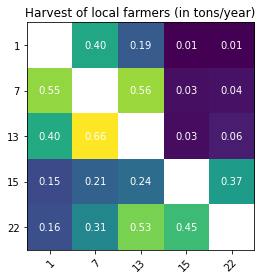

In [25]:
y_behs = REL_STATE_BEH
x_behs = REL_STATE_BEH

fig, ax = plt.subplots()
im = ax.imshow(heatmap_data)
              
# We want to show all ticks...
ax.set_xticks(np.arange(len(x_behs)))
ax.set_yticks(np.arange(len(y_behs)))
# ... and label them with the respective list entries
ax.set_xticklabels(x_behs)
ax.set_yticklabels(y_behs)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(y_behs)):
    for j in range(len(x_behs)):
        number = "{:.2f}".format(heatmap_data[i][j])
        text = ax.text(j, i, number,
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()